In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report

# Import and format data

In [2]:
# load images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# vectorize all of the images
x_train = x_train.reshape(-1, 784)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1, 784)
y_test = y_test.reshape(-1,1)

# convert to black/white
x_train_int = np.array([np.round(image/256) for image in x_train])
x_test_int = np.array([np.round(image/256) for image in x_test])

# Create 10 subsets of a digit or not a digit labels

In [3]:
y_zeros = np.array([1 if y_train[i]==0 else -1 for i in range(len(y_train))]).reshape(-1,1)
y_ones  = np.array([1 if y_train[i]==1 else -1 for i in range(len(y_train))]).reshape(-1,1)
y_twos  = np.array([1 if y_train[i]==2 else -1 for i in range(len(y_train))]).reshape(-1,1)
y_threes= np.array([1 if y_train[i]==3 else -1 for i in range(len(y_train))]).reshape(-1,1)
y_fours = np.array([1 if y_train[i]==4 else -1 for i in range(len(y_train))]).reshape(-1,1)
y_fives = np.array([1 if y_train[i]==5 else -1 for i in range(len(y_train))]).reshape(-1,1)
y_sixes = np.array([1 if y_train[i]==6 else -1 for i in range(len(y_train))]).reshape(-1,1)
y_sevens= np.array([1 if y_train[i]==7 else -1 for i in range(len(y_train))]).reshape(-1,1)
y_eights= np.array([1 if y_train[i]==8 else -1 for i in range(len(y_train))]).reshape(-1,1)
y_nines = np.array([1 if y_train[i]==9 else -1 for i in range(len(y_train))]).reshape(-1,1)

# one big array
y_nums = np.array([y_zeros, y_ones, y_twos, y_threes, y_fours, y_fives, y_sixes, y_sevens, y_eights, y_nines])

# Look at SVD decomp and decide which dimensions to keep

In [4]:
U, s, VT = np.linalg.svd(x_train, full_matrices=False)

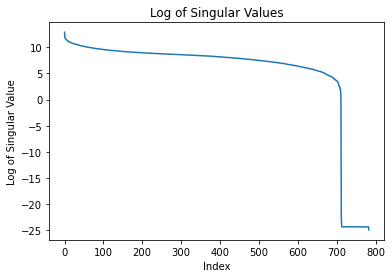

In [5]:
fig, ax = plt.subplots()
ax.plot(np.log(s))
plt.xlabel('Index')
plt.ylabel('Log of Singular Value')
plt.title('Log of Singular Values')
plt.show()

## Explained variance vs number of singular values included

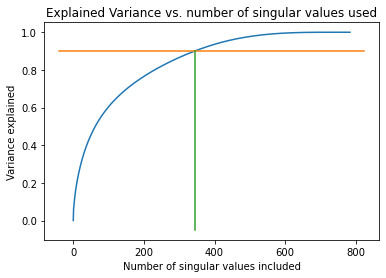

In [6]:
s_adj = s / np.sum(s)
comps = range(0,s.shape[0])
expl_var = []
for comp in comps:
    expl_var.append(np.sum(s_adj[:comp]))
fig, ax = plt.subplots()
ax.plot(comps, expl_var)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0.9,0.9])
ax.plot([345,345], [ax.get_ylim()[0],0.9])
plt.title('Explained Variance vs. number of singular values used')
plt.xlabel('Number of singular values included')
plt.ylabel('Variance explained')
plt.show()

## Reconstruct training data using the most significant singular values, and then only first 2 and 3 principal components

In [7]:
keep = 345
U_red = U[:,:keep]
s_red = s[:keep]
VT_red = VT[:keep,:]

In [8]:
x_train_red = U_red @ np.diag(s_red) @ VT_red
x_train2d = x_train @ VT[:2,:].T
x_train3d = x_train @ VT[:3,:].T
x_test2d = x_test @ VT[:2,:].T
x_test3d = x_test @ VT[:3,:].T

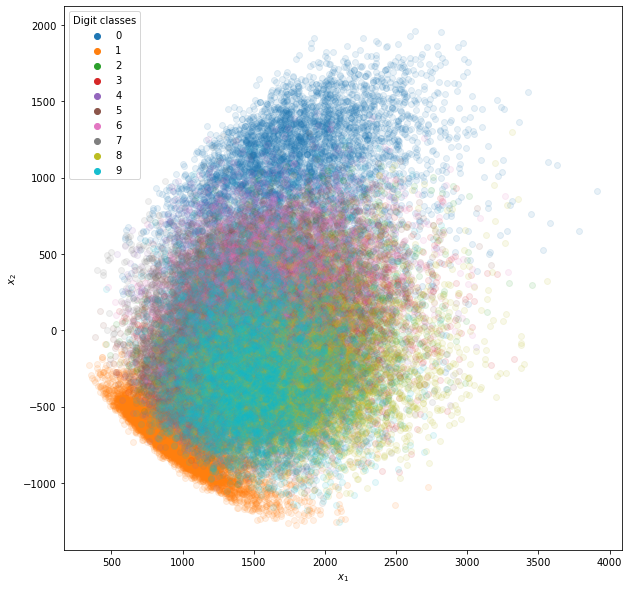

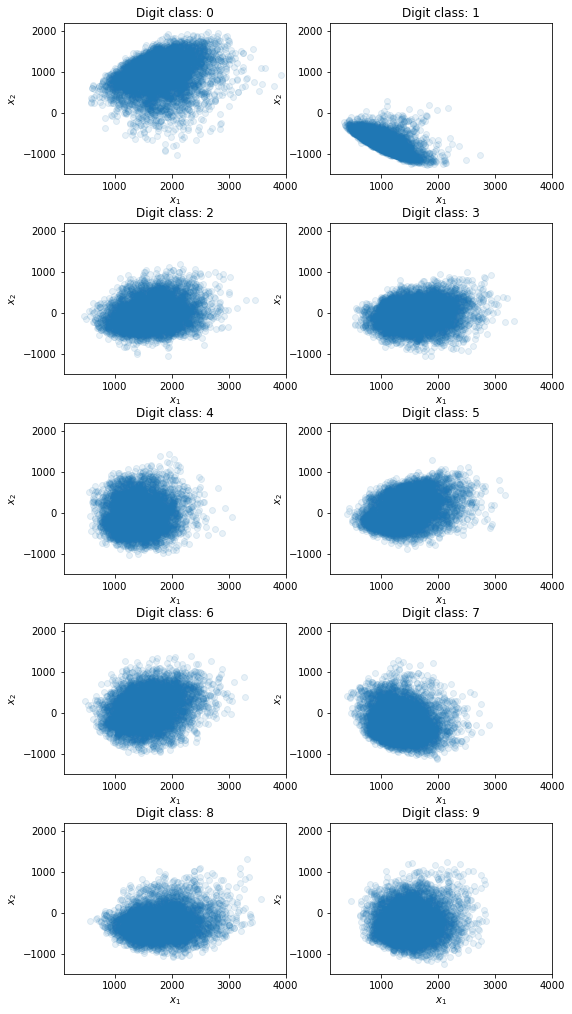

In [9]:
# test = x_train @ VT[:3,:].T
# %matplotlib notebook
# fig = plt.figure(figsize=[10,10])
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(test[:,0], test[:,1], test[:,2], c=y_nines, cmap='jet')
# plt.show()

%matplotlib inline
fig, ax = plt.subplots(figsize=[10,10])
for label in np.unique(y_train):
    truth = (y_train==label).reshape(-1)
    ax.scatter(x_train2d[truth,0], x_train2d[truth,1], alpha=0.1, label=label)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
leg = plt.legend(title='Digit classes')
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.show()
fig.savefig('all_one_plot.png', dpi=400, format='png')

%matplotlib inline
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=[17.5/2,17.5])
plt.subplots_adjust(hspace=0.32)
for label in np.unique(y_train):
    truth = (y_train==label).reshape(-1)
    axis = ax[int(np.floor(label/2)), label%2]
    axis.scatter(x_train2d[truth,0], x_train2d[truth,1], alpha=0.1, label=label)
    axis.set_title('Digit class: ' + str(label))
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')
    axis.set_xlim([100,4000])
    axis.set_ylim([-1500,2200])
plt.show()
fig.savefig('separate_subplots.png', dpi=400, format='png')

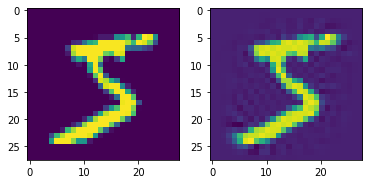

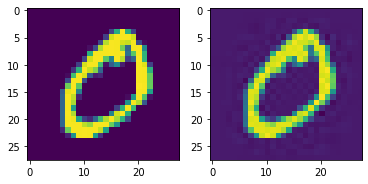

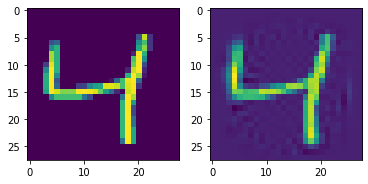

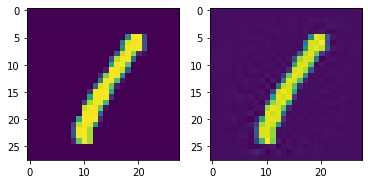

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(x_train[0].reshape(28,28))
ax2.imshow(x_train_red[0].reshape(28,28))
plt.show()
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(x_train[1].reshape(28,28))
ax2.imshow(x_train_red[1].reshape(28,28))
plt.show()
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(x_train[2].reshape(28,28))
ax2.imshow(x_train_red[2].reshape(28,28))
plt.show()
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(x_train[3].reshape(28,28))
ax2.imshow(x_train_red[3].reshape(28,28))
plt.show()

# Classification for unreduced data

In [12]:
# calculate weights for each linear classifier
lamb = 0.01
x = x_train
inv = np.linalg.inv(x.T @ x + lamb*np.identity(x.shape[1]))
first = inv @ x.T
ws = np.zeros([10, x.shape[1], 1])
for index, y in enumerate(y_nums):
    ws[index] = first @ y
    
    
# predict labels for training data
yhat = -1*np.zeros([x.shape[0], 1])
y = y_train
for i, image in enumerate(x):
    # get pred for each class
    pred = [image @ ws[y] for y in range(10)]
    yhat[i] = np.argmax(pred)
print(classification_report(y, yhat))


# predict labels for test data
yhat = -1*np.zeros([x_test.shape[0], 1])
x = x_test
y = y_test
for i, image in enumerate(x):
    # get pred for each class
    pred = [image @ ws[y] for y in range(10)]
    yhat[i] = np.argmax(pred)
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       0.06      0.22      0.10      5923
           1       0.06      0.00      0.00      6742
           2       0.09      0.05      0.06      5958
           3       0.05      0.00      0.00      6131
           4       0.15      0.27      0.19      5842
           5       0.10      0.00      0.00      5421
           6       0.01      0.00      0.00      5918
           7       0.01      0.00      0.00      6265
           8       0.04      0.12      0.05      5851
           9       0.09      0.04      0.06      5949

    accuracy                           0.07     60000
   macro avg       0.07      0.07      0.05     60000
weighted avg       0.07      0.07      0.05     60000

              precision    recall  f1-score   support

           0       0.06      0.20      0.09       980
           1       0.00      0.00      0.00      1135
           2       0.12      0.06      0.08      1032
           3       0.07 

# Classification for truncated SVD data

In [17]:
# calculate weights for each linear classifier
lamb = 0.01
x = x_train_red
inv = np.linalg.inv(x.T @ x + lamb*np.identity(x.shape[1]))
first = inv @ x.T
# inv = np.linalg.inv(np.diag(s[:keep])**2 + lamb*np.identity(keep))
# first = VT_red.T @ inv @ np.diag(s[:keep]) @ U_red.T
ws = np.zeros([10, 784, 1])
for index, y in enumerate(y_nums):
    ws[index] = first @ y
    
    
# predict labels for training data
yhat = -1*np.zeros([x.shape[0], 1])
y = y_train
for i, image in enumerate(x):
    # get pred for each class
    pred = [image @ ws[y] for y in range(10)]
    yhat[i] = np.argmax(pred)
print(classification_report(y, yhat))


# predict labels for test data
yhat = -1*np.zeros([x_test.shape[0], 1])
x = x_test
y = y_test
for i, image in enumerate(x):
    # get pred for each class
    pred = [image @ ws[y] for y in range(10)]
    yhat[i] = np.argmax(pred)
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      5923
           1       0.82      0.97      0.88      6742
           2       0.90      0.80      0.85      5958
           3       0.82      0.85      0.83      6131
           4       0.84      0.87      0.86      5842
           5       0.87      0.69      0.76      5421
           6       0.89      0.92      0.91      5918
           7       0.87      0.86      0.86      6265
           8       0.79      0.74      0.77      5851
           9       0.80      0.80      0.80      5949

    accuracy                           0.85     60000
   macro avg       0.85      0.84      0.84     60000
weighted avg       0.85      0.85      0.85     60000

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       980
           1       0.83      0.97      0.90      1135
           2       0.91      0.79      0.85      1032
           3       0.84 

# Classification for 2D data

In [15]:
# calculate weights for each linear classifier
lamb = 0.01
x = x_train2d
inv = np.linalg.inv(x.T @ x + lamb*np.identity(x.shape[1]))
first = inv @ x.T
ws = np.zeros([10, x.shape[1], 1])
for index, y in enumerate(y_nums):
    ws[index] = first @ y
    
    
# predict labels for training data
yhat = -1*np.zeros([x.shape[0], 1])
y = y_train
for i, image in enumerate(x):
    # get pred for each class
    pred = [image @ ws[y] for y in range(10)]
    yhat[i] = np.argmax(pred)
print(classification_report(y, yhat))


# predict labels for test data
yhat = -1*np.zeros([x_test.shape[0], 1])
x = x_test2d
y = y_test
for i, image in enumerate(x):
    # get pred for each class
    pred = [image @ ws[y] for y in range(10)]
    yhat[i] = np.argmax(pred)
print(classification_report(y, yhat))

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.24      0.97      0.38      5923
           1       0.26      0.99      0.41      6742
           2       0.00      0.00      0.00      5958
           3       0.00      0.00      0.00      6131
           4       0.00      0.00      0.00      5842
           5       0.00      0.00      0.00      5421
           6       0.00      0.00      0.00      5918
           7       0.00      0.00      0.00      6265
           8       0.15      0.25      0.18      5851
           9       0.00      0.00      0.00      5949

    accuracy                           0.23     60000
   macro avg       0.06      0.22      0.10     60000
weighted avg       0.07      0.23      0.10     60000

              precision    recall  f1-score   support

           0       0.24      0.98      0.39       980
           1       0.26      1.00      0.42      1135
           2       0.00      0.00      0.00      1032
           3       0.00 

# Classification for 3D data

In [16]:
# calculate weights for each linear classifier
lamb = 0.01
x = x_train3d
inv = np.linalg.inv(x.T @ x + lamb*np.identity(x.shape[1]))
first = inv @ x.T
ws = np.zeros([10, x.shape[1], 1])
for index, y in enumerate(y_nums):
    ws[index] = first @ y
    
    
# predict labels for training data
yhat = -1*np.zeros([x.shape[0], 1])
y = y_train
for i, image in enumerate(x):
    # get pred for each class
    pred = [image @ ws[y] for y in range(10)]
    yhat[i] = np.argmax(pred)
print(classification_report(y, yhat))


# predict labels for test data
yhat = -1*np.zeros([x_test.shape[0], 1])
x = x_test3d
y = y_test
for i, image in enumerate(x):
    # get pred for each class
    pred = [image @ ws[y] for y in range(10)]
    yhat[i] = np.argmax(pred)
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       0.34      0.96      0.50      5923
           1       0.36      0.99      0.53      6742
           2       0.00      0.00      0.00      5958
           3       0.47      0.35      0.40      6131
           4       0.39      0.11      0.17      5842
           5       0.00      0.00      0.00      5421
           6       0.00      0.00      0.00      5918
           7       0.33      0.76      0.46      6265
           8       0.26      0.05      0.08      5851
           9       0.05      0.02      0.03      5949

    accuracy                           0.34     60000
   macro avg       0.22      0.32      0.22     60000
weighted avg       0.22      0.34      0.22     60000

              precision    recall  f1-score   support

           0       0.34      0.98      0.51       980
           1       0.37      1.00      0.54      1135
           2       0.00      0.00      0.00      1032
           3       0.47 